In [1]:
import numpy as np
import vtk
import os
import matplotlib.pyplot as plt
import vtuIO

In [2]:
# Auswertepunkte definieren:
pts = ({"O1": (4.1451878628, 2.7959645174, 0.0), 
        "O2": (6.6323005804, 4.4735432278, 0.0), 
        "O3": (11.6065260158, 7.8287006486, 0.0), 
        "O4": (-2.7959645174, 4.1451878628, 0.0), 
        "O5": (-4.4735432278, 6.6323005804, 0.0), 
        "O6": (-7.8287006486, 11.6065260158, 0.0), 
        "T1": (0.0, 1.04, 0.0),
        "T2": (1.04, 0.0, 0.0),
        "T3": (0.0, -1.04, 0.0),
        "T4": (-1.04, 0.0, 0.0),
        "T5": (0.8621990755, 0.5815606196, 0.0), 
        "T6": (-0.5815606196, 0.8621990755, 0.0),
        "H1": (0.0, 0.525, 0.0),
        "H2": (0.6010522401, 0.405414855, 0.0),
        "H3": (0.0, -0.525, 0.0),
        "H4": (-0.525, 0.0, 0.0),
        "H5": (0.4352447256, 0.2935762743, 0.0),
        "H6": (-0.2935762743, 0.4352447256, 0.0),
        "H7": (0.0, 0.725, 0.0),
        "H8": (0.725, 0.0, 0.0),
        "H9": (0.0, -0.725, 0.0),
        "H10": (-0.725, 0.0, 0.0),
        "H11": (0.6010522401, 0.405414855, 0.0),
        "H12": (-0.405414855, 0.6010522401, 0.0)})

TH2M Ergebnisse einlesen mit Pfad

In [3]:
cd p:\DECOVALEX2023\_Task_C\006_modeling\Berechnung\OGS_6_TH2M\step0c\008\results\

p:\DECOVALEX2023\_Task_C\006_modeling\Berechnung\OGS_6_TH2M\step0c\008\results


In [4]:
pvd_TH2M = vtuIO.PVDIO("TH2M.pvd", dim=2)

TH2M.pvd


In [5]:
# Array fuer Zeitpunkte auslesen, result array anlegen; Daten aus .pvd/.vtu einlesen:
time_TH2M = pvd_TH2M.timesteps
results_TH2M = pvd_TH2M.read_time_series(["liquid_pressure_interpolated",\
                                          "capillary_pressure_interpolated",\
                                          "temperature_interpolated",\
                                          "displacement",\
                                          "vapour_pressure",\
                                          "xmCG",\
                                          "liquid_density",\
                                          "saturation"], pts)

#So kann eine Variable an punkt O2 aufgerufen werden:
#results_TH2M["O2"]["temperature"]

In [6]:
# compute relative humidity
for point in pts:
    results_TH2M[point]["relative_humidity"]=[]
    if point.startswith(("O")):
        results_TH2M[point]["relative_humidity"] = np.ones_like(results_TH2M[point]["temperature_interpolated"])
    else:
        relative_humidity = []
        for pCap, T, rhoLR in zip(results_TH2M[point]["capillary_pressure_interpolated"],\
                                  results_TH2M[point]["temperature_interpolated"],\
                                  results_TH2M[point]["liquid_density"]):
            RH = np.exp(-pCap*18.02e-03/(8.314*rhoLR*T))
            relative_humidity.append(RH)
        
        results_TH2M[point]["relative_humidity"] = relative_humidity

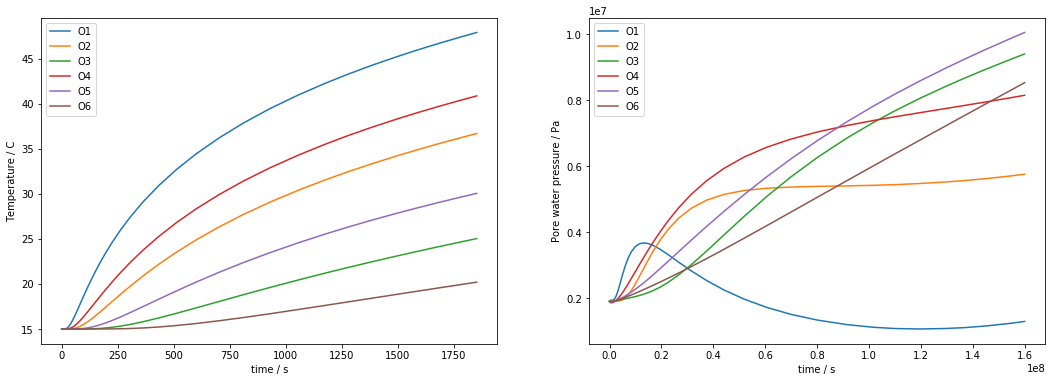

In [7]:
#POINTS OPALINUS
fig1 = plt.figure(figsize=(18, 6))
subplot1 = plt.subplot(1,2,1)
for point in pts:
    if point.startswith(("O")): #OPA Pts
        plt.plot(time_TH2M/(3600*24), results_TH2M[point]["temperature_interpolated"]-273.15, label=point)
        #plt.plot(time_TR, results_TR[point]["temperature"], 'k', ls=('dashed'))
plt.xlabel('time / s')
plt.ylabel('Temperature / C')
subplot1.legend()
#plt.title('Comparison of temperature results obtained by \n  T-Richards flow (black/dashed) and TH(2M)(solid coloured)')

subplot2 = plt.subplot(1,2,2)
for point in pts:
    if point.startswith(("O")): #OPA Pts
        plt.plot(time_TH2M, results_TH2M[point]["liquid_pressure_interpolated"]-0.1013e06, label=point)
        #plt.plot(time_TR, results_TR[point]["pressure"], 'k', ls=('dashed'))
plt.xlabel('time / s')
plt.ylabel('Pore water pressure / Pa')
subplot2.legend()
#plt.title('Comparison of pore water pressure results obtained by \n  T-Richards flow (black/dashed) and TH(2M)(solid coloured)')

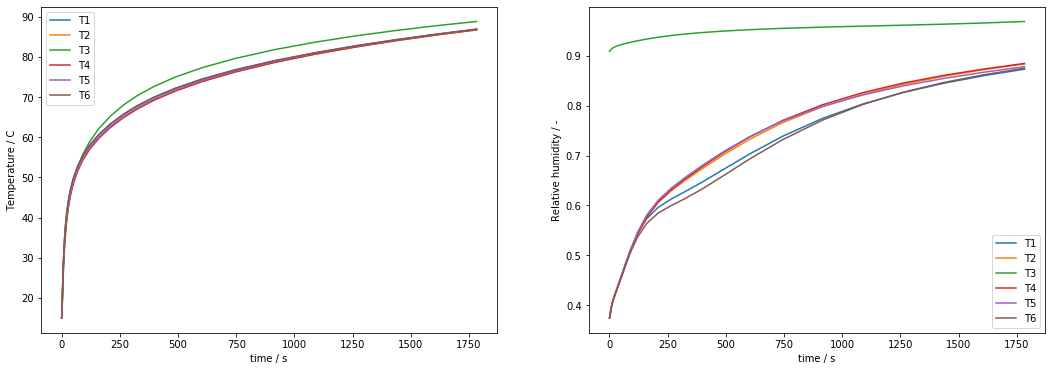

In [18]:
#POINTS TUNNEL
fig2 = plt.figure(figsize=(18, 6))
subplot1 = plt.subplot(1,2,1)
for point in pts:
    if point.startswith(("T")): #Tunnel Pts
        plt.plot(time_TH2M/(3600*24), results_TH2M[point]["temperature_interpolated"]-273.15, label=point)
        #plt.plot(time_TR, results_TR[point]["temperature"], 'k', ls=('dashed'))
plt.xlabel('time / s')
plt.ylabel('Temperature / C')
subplot1.legend()
#plt.title('Comparison of temperature results obtained by \n  T-Richards flow (black/dashed) and TH(2M)(solid coloured)')

subplot2 = plt.subplot(1,2,2)
for point in pts:
    if point.startswith(("T")): #Tunnel Pts
        plt.plot(time_TH2M/(3600*24), results_TH2M[point]["relative_humidity"], label=point)
        #plt.plot(time_TR, results_TR[point]["pressure"], 'k', ls=('dashed'))
plt.xlabel('time / s')
plt.ylabel('Relative humidity / -')
subplot2.legend()
#plt.title('Comparison of pore water pressure results obtained by \n  T-Richards flow (black/dashed) and TH(2M)(solid coloured)')

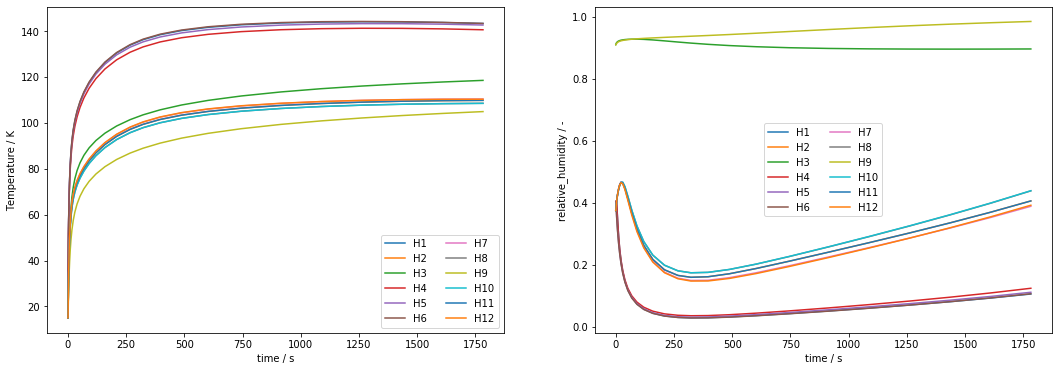

In [19]:
#POINTS HEATER
fig3 = plt.figure(figsize=(18, 6))
subplot1 = plt.subplot(1,2,1)
for point in pts:
    if point.startswith(("H")): #Heater Pts
        plt.plot(time_TH2M/(3600*24), results_TH2M[point]["temperature_interpolated"]-273.15, label=point)
        #plt.plot(time_TR, results_TR[point]["temperature"], 'k', ls=('dashed'))
plt.xlabel('time / s')
plt.ylabel('Temperature / K')
subplot1.legend(ncol=2)
#plt.title('Comparison of temperature results obtained by \n  T-Richards flow (black/dashed) and TH(2M)(solid coloured)')

subplot2 = plt.subplot(1,2,2)
for point in pts:
    if point.startswith(("H")): #Heater Pts
        plt.plot(time_TH2M/(3600*24), results_TH2M[point]["relative_humidity"], label=point)
        #plt.plot(time_TR, results_TR[point]["pressure"], 'k', ls=('dashed'))
plt.xlabel('time / s')
plt.ylabel('relative_humidity / -')
subplot2.legend(ncol=2)
#plt.title('Comparison of pore water pressure results obtained by \n  T-Richards flow (black/dashed) and TH(2M)(solid coloured)')  

In [20]:
#cd C:\pitz.m\Desktop\relative_permeability_tests

In [11]:
#fig1.savefig('TRMvsTH2M_SL_relperm_OPA.png', bbox_inches='tight', dpi=150)
#fig2.savefig('TRMvsTH2M_SL_relperm_tunnel.png', bbox_inches='tight', dpi=150)
#fig3.savefig('TRMvsTH2M_SL_relperm_heater.png', bbox_inches='tight', dpi=150)